In [3]:
#add imports 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


Upload dataset 

In [6]:
data=pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [8]:
#Dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [9]:
#Description of the dataset
data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [10]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]))

There are 179108 rows and 13 columns in the dataset.


Get Unique Values


In [ ]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = return_unique_values(data)
print(udf)

Plot of unique values by feature

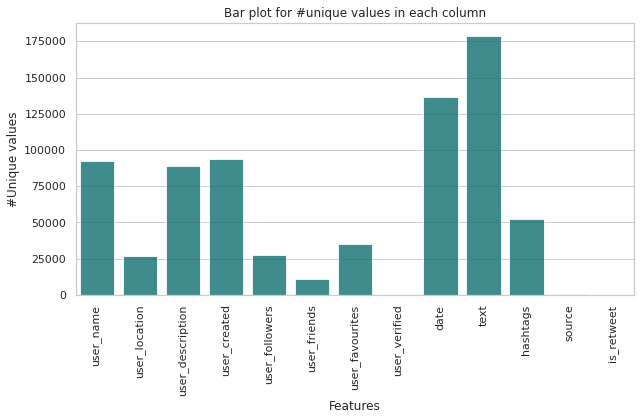

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8, color='teal')
plt.title('Bar plot for #unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Find Missing Values

In [29]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

mdf = return_missing_values(data)
print(mdf)

source                 77
user_description    10286
user_location       36771
hashtags            51334
dtype: int64


Plot features with missing values


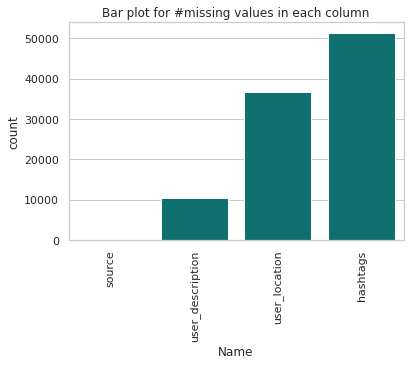

In [35]:
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values, color='teal')
    plt.xticks(rotation=90)
    plt.title('Bar plot for #missing values in each column')
    plt.show()

plot_missing_values(data)


In [31]:
data.user_location

0                         astroworld
1                       New York, NY
2                   Pewee Valley, KY
3               Stuck in the Middle 
4                  Jammu and Kashmir
                     ...            
179103               Ilorin, Nigeria
179104                       Ontario
179105                     🇨🇦 Canada
179106                 New York City
179107    Aliwal North, South Africa
Name: user_location, Length: 179108, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


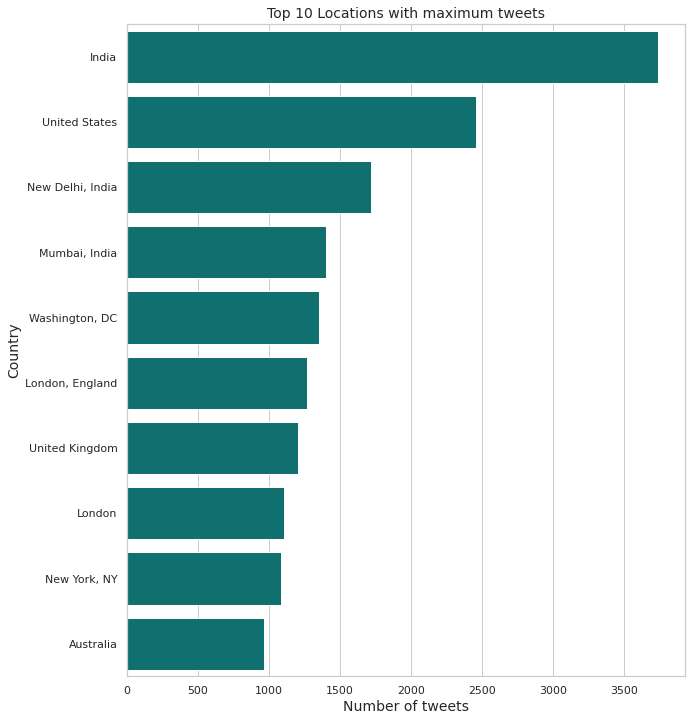

In [32]:
plt.figure(figsize=(10,12))
sns.barplot(data["user_location"].value_counts().values[0:10],
            data["user_location"].value_counts().index[0:10], color='teal');
plt.title("Top 10 Locations with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

Plot top 5 Hash tags

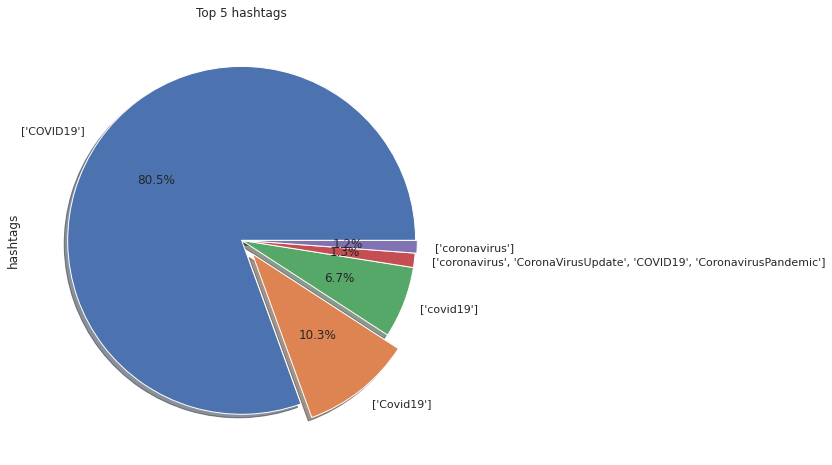

In [ ]:
top_tags=data['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


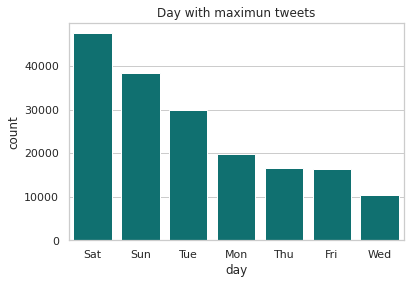

In [45]:
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].apply(lambda x : x.month)
data["day"] = data["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data["day"] = data["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(data["day"],color='teal', order=data['day'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


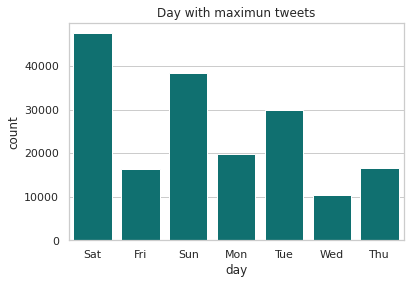

In [34]:
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].apply(lambda x : x.month)
data["day"] = data["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data["day"] = data["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(data["day"],color='teal')


Data Preprocessing


In [ ]:
import nltk
import re
import string

In [ ]:
    def clean_text(text):
    #Make text lowercase, remove text in square brackets,remove links,remove punctuation
    #and remove words containing numbers.
      text = text.lower()
      text = re.sub('\[.*?\]', '', text)
      text = re.sub('https?://\S+|www\.\S+', '', text)
      text = re.sub('<.*?>+', '', text)
      text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
      text = re.sub('\n', '', text)
      text = re.sub('\w*\d\w*', '', text)
      return text

data['text'] = data['text'].apply(lambda x: clean_text(x))

In [ ]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Month,day
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,thanks iamohmai for nominating me for the who ...,['WearAMask'],Twitter for Android,False,8,Sat
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,the year of insanity lol,['COVID19'],Twitter for Android,False,8,Sat
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,ctvnews a powerful painting by juan lucena its...,NaN,Twitter Web App,False,8,Sat
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,more than students test positive for at majo...,['COVID19'],Twitter for iPhone,False,8,Sat
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,i stop when i see a …,NaN,Twitter for Android,False,8,Sat


In [ ]:
   def remove_emoji(text):
 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

  
data['text']=data['text'].apply(lambda x: remove_emoji(x))

In [ ]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Month,day
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,7,Sat
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey yankees yankeespr and mlb wouldnt it have...,NaN,Twitter for Android,False,7,Sat
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never once clai...,['COVID19'],Twitter for Android,False,7,Sat
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,brookbanktv the one gift has give me is an ap...,['COVID19'],Twitter for iPhone,False,7,Sat
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin on novel coronavirusupda...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,7,Sat


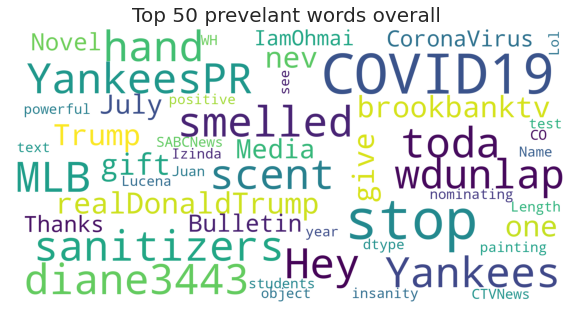

In [53]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
plt.title('Top 50 prevelant words overall', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

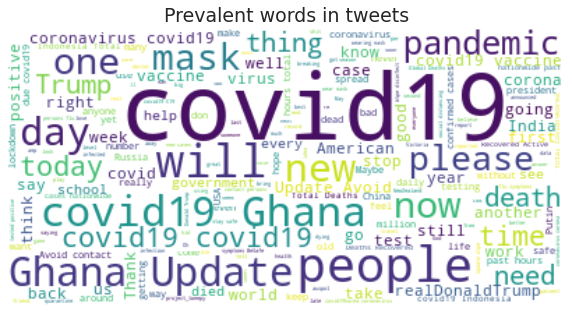

In [55]:
text = ",".join(review for review in data.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, background_color="white",stopwords=set(STOPWORDS)).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(10, 10))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()


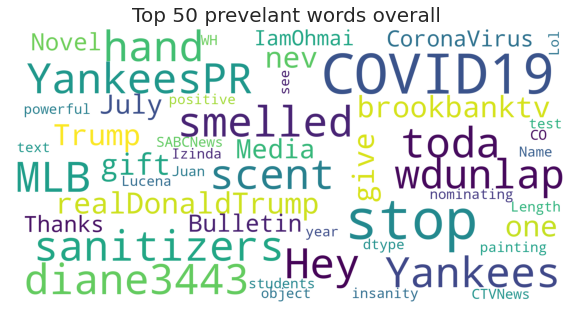

In [56]:
text = ",".join(review for review in data.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
plt.title('Top 50 prevelant words overall', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()